# Geometric Transformations using OpenCV (python)

Geometric transformations are a common image processing technique that have numerous applications, such as rescaling images for different screen sizes, aligning features on different images, augmenting data for machine learning, animating sprites programmatically, etc..



In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def DisplayImageComparison(original, augmented, augmentedTitle = "Augmented"):
    """This function shows a comparason of orginal vs augmented image"""
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(augmented)
    ax[1].set_title(augmentedTitle)
    plt.tight_layout()
    plt.show()
    
def ReadImageRGB(pathToImage):
    return cv2.cvtColor(cv2.imread('original.png'), cv2.COLOR_BGR2RGB)

In [2]:
original_im = ReadImageRGB('original.png')

Remember that images are represented as matrices, oftentimes resources on the internet, software documentation, and other sources will refer to the dimentions of the image using diffrent terms. Its important to keep the following in mind:

- x = width = number of columns
- y = height = number of rows

## Translation

Translation is the process of moving an image from its original location by shifting it in x and y directions. To carry out this operation, you need to specify how much movement in the x and y direction is required (lets call this t<sub>x</sub>, t<sub>y</sub>).

A transformation matrix will then need to be created. Given t<sub>x</sub> and t<sub>y</sub>, a transformation matrix M can be defined as:

$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$


In [3]:
def ImageTranslation(image, xOffset, yOffset):
    # Translate the image by x and y offset
    # image - input image as a matrix
    # xOffset - offset in x direction
    # yOffset - offset in y direction

    # define the transformation matrix m
    M = np.float32([[1,0,xOffset],[0,1,yOffset]])
    
    # preform the image Translation and return the results
    return cv2.warpAffine(image,M,(image.shape[1], image.shape[0]))

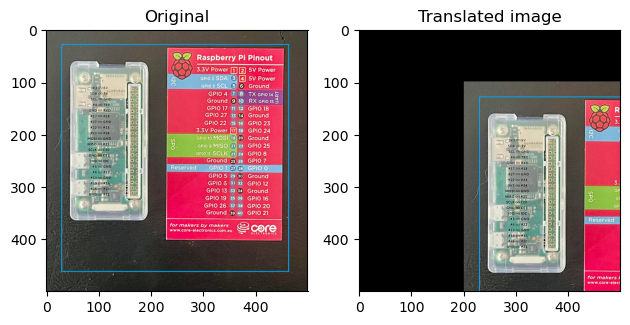

In [4]:
# Translate the image by 200 pixels in the x directrion and 100 in the y direction
translated_im = ImageTranslation(original_im,200,100)

# Show the results 
DisplayImageComparison(original_im, translated_im,"Translated image")

## Scaling
Scaling is the process of resizing the image, that is, changing the width and height of the image. This process preserves the orientation of the image. The new size of the image can be defined in 2 ways, either by specifying a scaling factor or by specifying the width and height of the desired image.

When scaling images, the concept of interpolation is essential. this is because when resizing an image, the algorithm will need to determine how to fill in missing values (upscaling) or which values to discard (downscaling) in order to produce a more natural-looking result.


In [5]:
def ScaleImageByRatio(image, xScale, yScale, interpolationMethod = cv2.INTER_LINEAR):
    # Scale the image using a scaling factor
    # image - input image as a matrix
    # xScale - scale factor for the x axis (width) 
    # yScale - scale factor for the y axis (height)
    # interpolationMethod - interpolation method used
    
    return cv2.resize(image,None,fx=xScale, fy=yScale, interpolation = interpolationMethod)

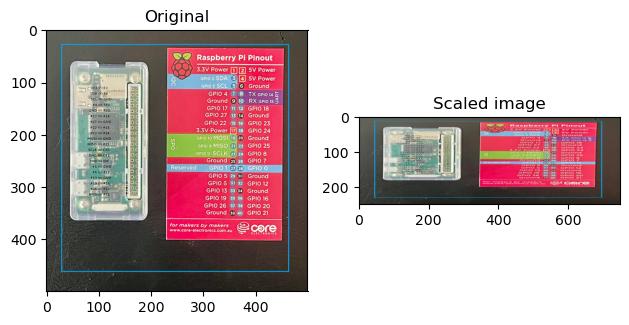

In [6]:
# Scale the image 1.5 times on the x axis, and .5 times on the y axis
scaled_im = ScaleImageByRatio(original_im,1.5,.5)

# Show the results 
DisplayImageComparison(original_im, scaled_im,"Scaled image")

In [7]:
def ScaleImageToSize(image, newWidth, newHeight, interpolationMethod = cv2.INTER_LINEAR):
    # Scale the image to a given size
    # image - input image as a matrix
    # newWidth - new Width for the imamge (x axis) 
    # newHeight - new height for the image (y axis)
    # interpolationMethod - interpolation method used
    
    return cv2.resize(image,(newWidth, newHeight), interpolation = interpolationMethod)

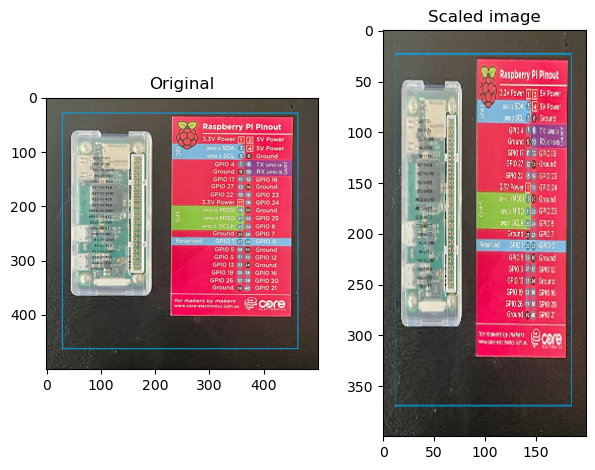

In [8]:
# Scale the to 200 (width) x 400 (height)
scaled_im = ScaleImageToSize(original_im,200,400)

# Show the results 
DisplayImageComparison(original_im, scaled_im,"Scaled image")

# Rotation

Rotate the image given an angle. The image can be rotated on the midpoint by defining the following transformation matrix (where $\Theta$ is the angle of rotation) : 

$M =  \begin{bmatrix} cos\Theta  & -sin\Theta  \\ sin\Theta & cos\Theta \end{bmatrix}$



OpenCV also allows us to easily preform a similarity transform, we will take advantage of this in the implimentation of the function. In a similiraty transform a midpoint for the rotation can be defined (i.e. the rotation isn't always from the centre of the image), as well as a way to scale the image in the rotation process. This can be done by setting up the following transformation matrix:

$M =\begin{bmatrix} \alpha & \beta & (1-\alpha).centre.x-\beta.centre.y\\-\beta  & \alpha  & \beta.centre.x+(1-\alpha).centre.y\end{bmatrix} $

where

$\alpha = scale.cos\Theta $

$\beta = scale.cos\Theta $

In [9]:
def RotateImage(image, angleOfRotation, midPoint = None, scale = 1 ):
    # Preform a similarity transform on the image
    # image - input image as a matrix
    # angleOfRotation - angel of rotation for the output
    # midpoint for the rotation as a (x,y) tuple, defult is centre of image
    # scaling factor for the output
    
    rows,cols = image.shape[:2]
    
    if not midPoint:
        midPoint = (cols/2, rows/2)
    
    M = cv2.getRotationMatrix2D(midPoint,angleOfRotation,scale)
    return cv2.warpAffine(image,M,(cols,rows))

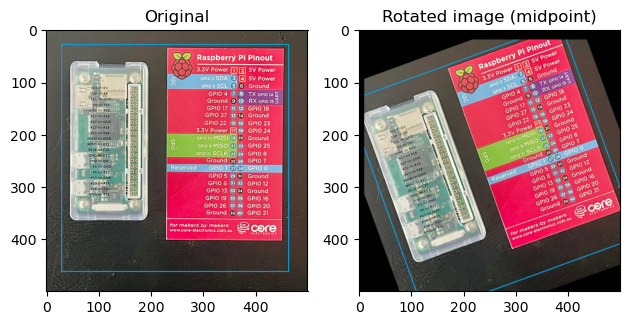

In [10]:
# Rotate the image 20 degrees at the midpoint
rotated_im = ImageTranslation(RotateImage(original_im,20),10,20)

# Show the results 
DisplayImageComparison(original_im, rotated_im,"Rotated image (midpoint)")

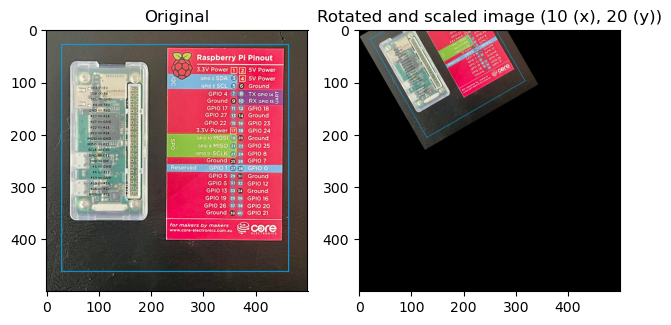

In [11]:
# Rotate the image 30 degrees at the pixel 10 (x), 20 (y) and scale the image to .8
rotated_im = RotateImage(original_im,30,(10,20),.5)

# Show the results 
DisplayImageComparison(original_im, rotated_im,"Rotated and scaled image (10 (x), 20 (y))")

## Affine Transformation
Affine transformations preserve the parallelism of lines in an image. To apply a transformation, we need three points from the input image and their corresponding locations in the output image.

In this transform parallelism is preserved, however image rotation and scale is altered to get to the desired output

In [12]:
def AffineTransform(image,orignPoints, destPoints):
    # Preform a affine transform on the image
    # image - input image as a matrix
    # orignPoints - list of list containing original 3 points for the transformation i.e. [[x1,y1],[x2,y2],[x3,y3]]
    # destPoints - list of list containing destination of the 3 points original points i.e. [[x1,y1],[x2,y2],[x3,y3]]
    rows,cols = image.shape[:2]
    origin = np.float32(orignPoints)
    dest = np.float32(destPoints)

    M = cv2.getAffineTransform(origin,dest)

    return cv2.warpAffine(image,M,(cols,rows))
    

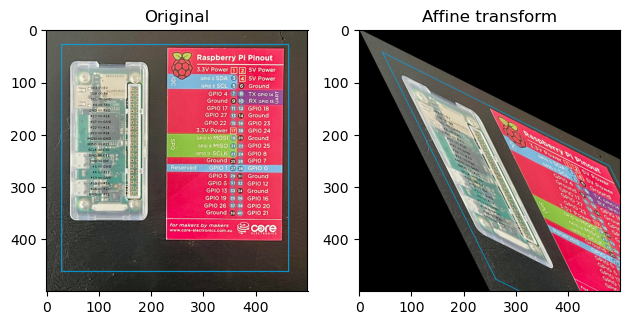

In [13]:
# Perform an affine transform where the 0th pixel from the top and left are shifted by 5
affine_im = AffineTransform(original_im,[[0,0],[0,10],[10,0]],[[0,0],[5,10],[10,5]])

# Show the results 
DisplayImageComparison(original_im, affine_im,"Affine transform")

## Perspective Transformation
To perform perspective transformations, you need a 3x3 transformation matrix. Perspective transformations preserve straight lines - that is, they remain unchanged once the transformation has been made. To find the transformation matrix for this image, you need to know the coordinates of four points on the input image and their corresponding points on the output image. Among these 4 points, 3 of them should not be collinear.  

In [14]:
def PerspectiveTransform(image,orignPoints, destPoints):
    # Preform a perspective transform on the image
    # image - input image as a matrix
    # orignPoints - list of list containing original 4 points for the transformation i.e. [[x1,y1],[x2,y2],[x3,y3]]
    # destPoints - list of list containing destination of the 4 points original points i.e. [[x1,y1],[x2,y2],[x3,y3]]
    rows,cols = image.shape[:2]
    origin = np.float32(orignPoints)
    dest = np.float32(destPoints)

    M = cv2.getPerspectiveTransform(origin,dest)

    return cv2.warpPerspective(image,M,(cols,rows))
    

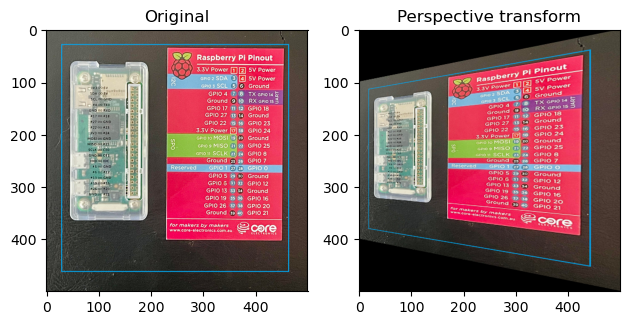

In [15]:
# Perform a perspective transform where the right side of the image is sticky (points 500,0 and 500,500)
# The left side has been pinched in the y axis by 200 px.
perspective_im = PerspectiveTransform(original_im,[[500,0],[500,500],[0,0],[0,500]],[[500,0],[500,500],[0,100],[0,400]])

# Show the results 
DisplayImageComparison(original_im, perspective_im,"Perspective transform")